# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.100968e+01     7.474624e+00
 * time: 0.0035309791564941406
     1     2.915758e+01     5.324908e+00
 * time: 0.015558004379272461
     2     1.986962e+01     5.950339e+00
 * time: 0.0303800106048584
     3     1.460127e+01     5.526929e+00
 * time: 0.04562687873840332
     4     1.128238e+01     1.620022e+00
 * time: 0.0609898567199707
     5     1.059111e+01     2.910240e+00
 * time: 0.07356786727905273
     6     9.840350e+00     1.506175e+00
 * time: 0.08592987060546875
     7     9.129494e+00     1.419015e+00
 * time: 0.0981900691986084
     8     8.781077e+00     1.427769e+00
 * time: 0.1105189323425293
     9     8.579637e+00     1.210728e+00
 * time: 0.12374186515808105
    10     8.433904e+00     9.554305e-01
 * time: 0.1370229721069336
    11     8.279007e+00     7.614802e-01
 * time: 0.15025806427001953
    12     8.184953e+00     6.596768e-01
 * time: 0.16025185585021973
    13     8.128024e+00     4.701738e-01
 * time: 0

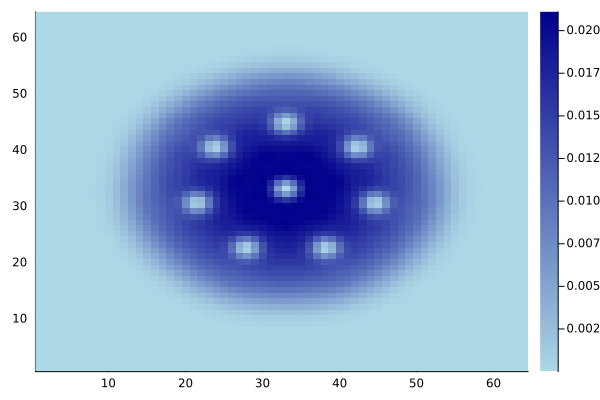

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)